# 1. Chargement des donn√©es
## 1.1 Importation des biblioth√®ques n√©cessaires (pandas, numpy, etc.)

On commence par importer les outils Python indispensables pour manipuler les donn√©es et effectuer des calculs.

In [309]:
import pandas as pd
import numpy as np

## 1.2 Lecture du fichier CSV contenant les donn√©es (appartements-data-db.csv)

On charge les donn√©es depuis un fichier CSV pour pouvoir les analyser et travailler dessus.


In [310]:
# Chargement des donn√©es depuis le fichier CSV
df = pd.read_csv('../data/appartements-data-db.csv')

## 1.3 Visualisation des premi√®res lignes du dataset avec `df.head()`

On affiche les premi√®res lignes du tableau pour avoir un aper√ßu rapide des donn√©es.

In [311]:
df.head()

title         price  \
0       CMN-MA-1752 - Appartement √† vendre √† Palmier  2‚ÄØ000‚ÄØ000 DH   
1  66370-Vente Appt √† Casablanca Hay Hassani de 1...  1‚ÄØ195‚ÄØ000 DH   
2           Appartement √† vendre 81 m¬≤ √† Dar Bouazza  1‚ÄØ350‚ÄØ000 DH   
3  63860-Vente Appt √† Casablanca Quartier Bd Med ...    900‚ÄØ000 DH   
4                          Appartement √† Rabat Agdal  3‚ÄØ100‚ÄØ000 DH   

     city_name  salon  nb_rooms  nb_baths  surface_area  \
0   Casablanca    NaN       2.0       2.0         168.0   
1   Casablanca    NaN       2.0       2.0          98.0   
2  Dar Bouazza    1.0       2.0       2.0          81.0   
3   Casablanca    NaN       1.0       1.0          56.0   
4        Rabat    2.0       3.0       2.0         200.0   

                                           equipment  \
0                  Ascenseur/Balcon/Parking/Terrasse   
1  Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...   
2  Ascenseur/Balcon/Chauffage/Climatisation/Conci...   
3  Ascenseur/Chauffage/Climatisation/Cuisine √âqui...   
4        Ascenseur/Balcon/Concierge/Parking/S√©curit√©   

                                                link  
0  https://www.avito.ma/fr/palmier/appartements/C...  
1  https://www.avito.ma/fr/hay_hassani/appartemen...  
2  https://www.avito.ma/fr/dar_bouazza/appartemen...  
3  https://www.avito.ma/fr/centre_ville/apparteme...  
4  https://www.avito.ma/fr/agdal/appartements/App...

## 1.4 Analyse de la structure du dataset avec `df.info()` pour rep√©rer les types et les valeurs manquantes

On examine la composition du tableau : types des colonnes, nombre de valeurs non nulles, pour identifier d‚Äô√©ventuels manques.

In [312]:
# Dimensions et types de donn√©es
print('Dimensions et types de donn√©es')
print(df.info())



Dimensions et types de donn√©es
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None


## 2. Analyse exploratoire des donn√©es (EDA)

### 2.1 V√©rification des dimensions et des types des colonnes

On v√©rifie la taille du jeu de donn√©es ainsi que le type de chaque colonne pour mieux comprendre sa structure.


In [313]:
print('Shape:', df.shape)
print('Types:', df.dtypes)

Shape: (1773, 9)
Types: title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object


### 2.2 Recherche des valeurs manquantes

On identifie les colonnes qui contiennent des donn√©es absentes afin de d√©cider comment les g√©rer.


In [314]:
# Valeurs manquantes et doublons
print('Valeurs manquantes par colonne:')
print(df.isnull().sum())

Valeurs manquantes par colonne:
title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64


### 2.3 V√©rification et suppression des doublons

On d√©tecte et supprime les lignes r√©p√©t√©es pour √©viter les biais dans l‚Äôanalyse.


In [315]:
# Suppression des doublons
print('Nombre de doublons:', df.duplicated().sum())
df = df.drop_duplicates()
print('Doublons supprim√©s. Nouvelle forme:', df.shape)

Nombre de doublons: 41
Doublons supprim√©s. Nouvelle forme: (1732, 9)


### 2.4 Statistiques descriptives g√©n√©rales pour les variables num√©riques

On calcule des statistiques basiques (moyenne, m√©diane, √©cart-type‚Ä¶) pour r√©sumer les donn√©es num√©riques.


In [316]:
# Statistiques descriptives et histogrammes des variables num√©riques
print(df.describe())


             salon     nb_rooms     nb_baths   surface_area
count  1579.000000  1454.000000  1444.000000    1701.000000
mean      1.263458     2.381706     2.263850     176.827160
std       0.555193     0.668407     7.424766    3005.066251
min       0.000000     1.000000     0.000000       1.000000
25%       1.000000     2.000000     1.000000      71.000000
50%       1.000000     2.000000     2.000000      88.000000
75%       1.000000     3.000000     2.000000     114.000000
max       8.000000     7.000000   134.000000  123456.000000



### 2.5 Visualisation des distributions avec des histogrammes

On trace des histogrammes pour observer la r√©partition des valeurs dans les colonnes num√©riques.


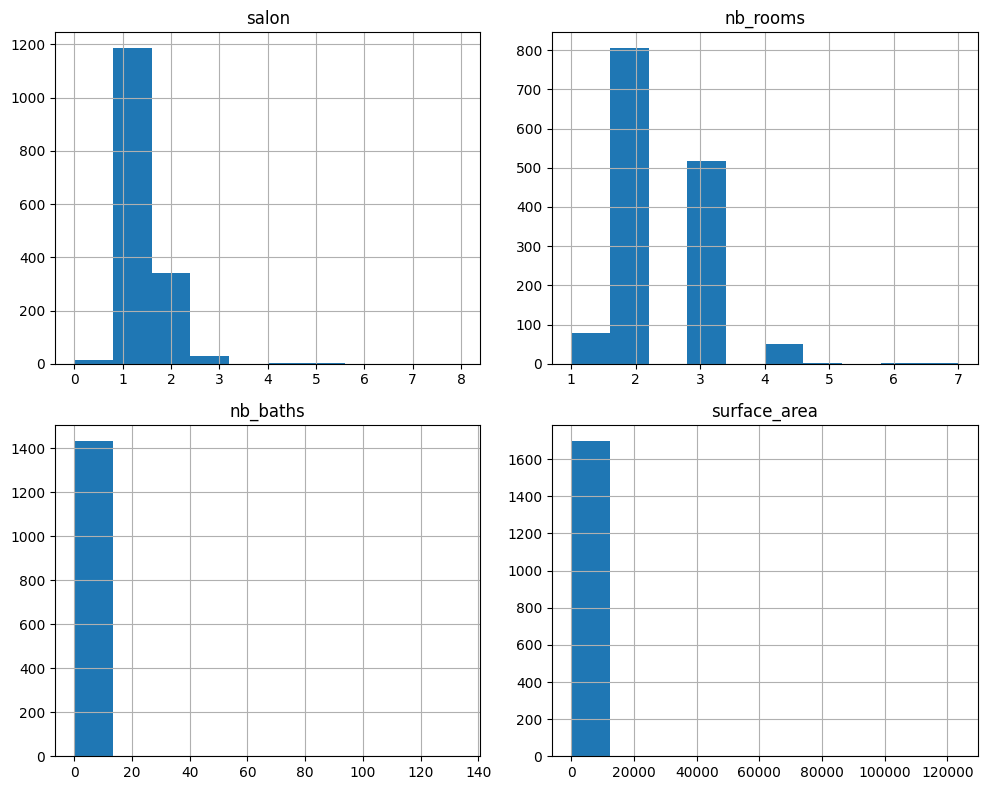

In [317]:
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(figsize=(10,8))
plt.tight_layout()
plt.show()


### 2.6 Matrice de corr√©lation et heatmap pour d√©tecter les relations entre variables

On calcule et visualise la corr√©lation entre variables pour comprendre leurs interactions.


                 salon  nb_rooms  nb_baths  surface_area
salon         1.000000  0.301097  0.031103     -0.002133
nb_rooms      0.301097  1.000000  0.053043      0.617838
nb_baths      0.031103  0.053043  1.000000      0.045448
surface_area -0.002133  0.617838  0.045448      1.000000


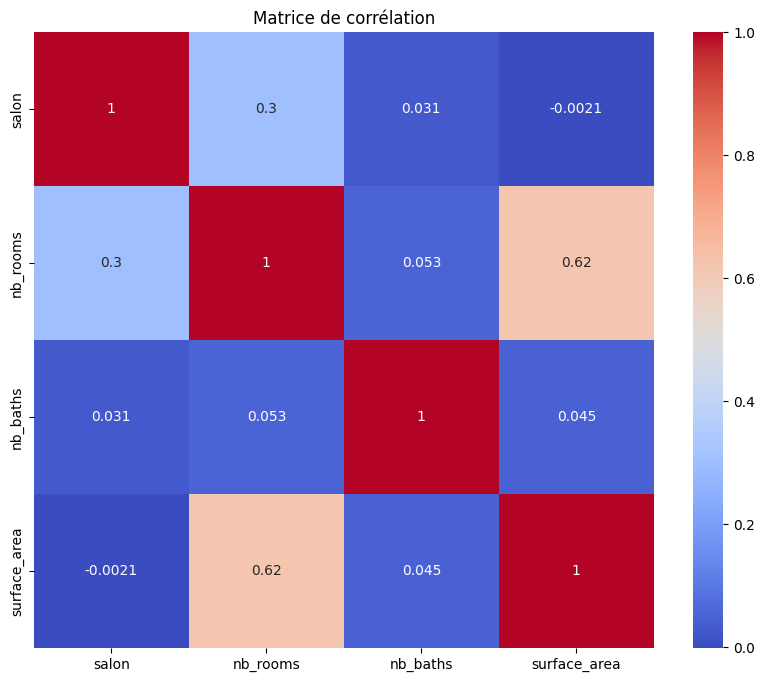

In [318]:
# Matrice de corr√©lation et heatmap
corr = df.corr(numeric_only=True)
print(corr)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corr√©lation')
plt.show()



### 2.7 Analyse des relations entre `price` et d‚Äôautres variables via `scatterplot`

On explore graphiquement comment le prix varie en fonction d‚Äôautres caract√©ristiques.

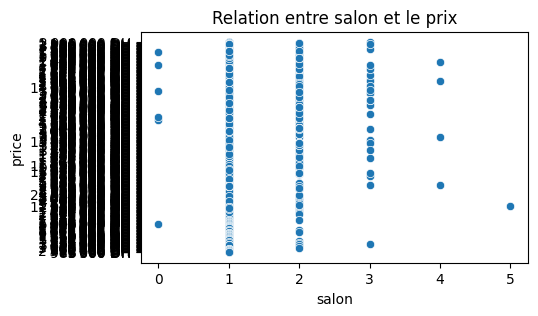

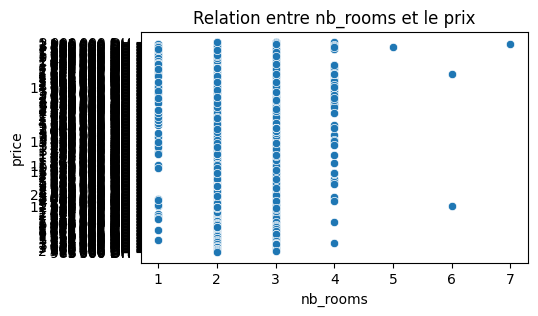

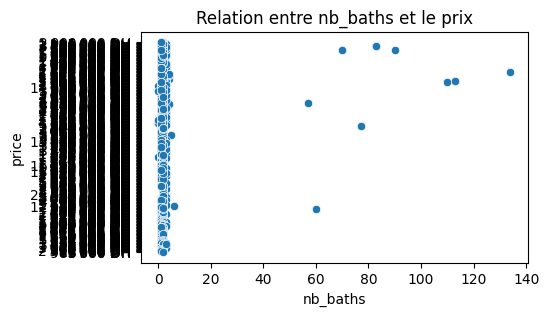

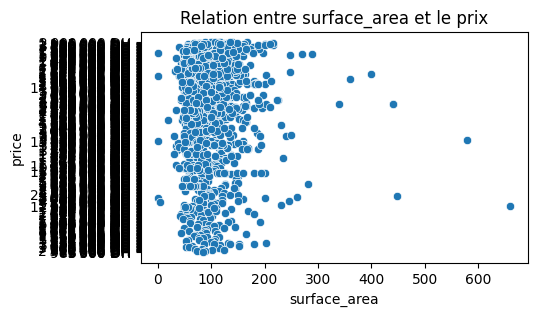

In [319]:
# Visualisation simple des relations entre chaque variable num√©rique et le prix
import matplotlib.pyplot as plt
import seaborn as sns
if 'price' in df.columns and not df['price'].isnull().all():
    numeric_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'price']
    for col in numeric_cols:
        if df[col].isnull().all():
            print(f"Toutes les valeurs de la colonne '{col}' sont manquantes.")
            continue
        plt.figure(figsize=(5,3))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'Relation entre {col} et le prix')
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show()

## 3. Pr√©traitement des donn√©es

### 3.1 Transformation de la colonne `equipment` en colonnes binaires (dummies)

On convertit les √©quipements list√©s en plusieurs colonnes indiquant la pr√©sence ou non de chaque √©quipement.


In [320]:
# Extraction des √©quipements en colonnes bool√©ennes
if 'equipment' in df.columns:
    equipment_dummies = df['equipment'].str.get_dummies(sep='/')
    df = pd.concat([df, equipment_dummies], axis=1)
    print('Colonnes √©quipements extraites :', equipment_dummies.columns.tolist())

Colonnes √©quipements extraites : ['Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine √âquip√©e', 'Duplex', 'Meubl√©', 'Parking', 'S√©curit√©', 'Terrasse']



### 3.2 Nettoyage des formats num√©riques (`price` ‚Üí float)

On s‚Äôassure que la colonne `price` est bien au format num√©rique pour pouvoir faire des calculs.


In [321]:
# Conversion de la colonne price en float et suppression des colonnes inutiles
print("\n1. Conversion de la colonne 'price' en float et suppression des NaN...")
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    print("Colonne 'price' convertie en float.")


1. Conversion de la colonne 'price' en float et suppression des NaN...
Colonne 'price' convertie en float.



### 3.3 Suppression des colonnes non pertinentes (`equipment`, `link`,`title`)

On retire les colonnes qui n‚Äôapportent pas d‚Äôinformation utile au mod√®le.


In [322]:
if 'equipment' in df.columns:
    df = df.drop('equipment', axis=1)
if 'link' in df.columns:
    df = df.drop('link', axis=1)
if 'title' in df.columns:
    df = df.drop('title', axis=1)


### 3.4 Harmonisation des noms de villes (traduction arabe ‚ûù fran√ßais)

On uniformise les noms de villes pour √©viter les doublons dus √† des traductions diff√©rentes.


In [323]:
# Traitement et uniformisation de la colonne city_name
city_map = {
    "ÿßŸÑÿØÿßÿ± ÿßŸÑÿ®Ÿäÿ∂ÿßÿ°": "Casablanca",
    "ÿØÿßÿ± ÿ®Ÿàÿπÿ≤ÿ©": "Dar Bouazza",
    "ÿßŸÑÿ±ÿ®ÿßÿ∑": "Rabat",
    "ŸÖÿ±ÿßŸÉÿ¥": "Marrakech",
    "ÿ£ÿµŸäŸÑÿ©": "Asilah",
    "ÿ®Ÿàÿ≥ŸÉŸàÿ±ÿ©": "Bouskoura",
    "ÿßŸÑŸÇŸÜŸäÿ∑ÿ±ÿ©": "K√©nitra",
    "ÿßŸÑŸÖÿ≠ŸÖÿØŸäÿ©": "Mohammedia",
    "ÿ£ŸÉÿßÿØŸäÿ±": "Agadir",
    "ÿ™ŸÖÿßÿ±ÿ© ÿßŸÑÿ¨ÿØŸäÿØÿ©": "Tamesna",
    "ÿ≥ŸÑÿß": "Sal√©",
    "ÿ≠ÿØ ÿ≥ŸàÿßŸÑŸÖ": "Had Soualem",
    "ÿ™ŸÖÿßÿ±ÿ©": "Temara",
    "ÿ®ŸÜ ÿ≥ŸÑŸäŸÖÿßŸÜ": "Benslimane",
    "ÿ∑ŸÜÿ¨ÿ©": "Tanger",
    "ÿ®Ÿàÿ≤ŸÜŸäŸÇÿ©": "Bouznika",
    "ŸÖŸÉŸÜÿßÿ≥": "Mekn√®s",
    "ŸÅÿßÿ≥": "F√®s",
    "ÿßŸÑÿ¨ÿØŸäÿØÿ©": "El Jadida",
    "ÿßŸÑŸÖŸÜÿµŸàÿ±Ÿäÿ©": "El Mansouria",
    "ŸÖÿ±ÿ™ŸäŸÑ": "Martil",
    "ÿßŸÑŸÅŸÜŸäÿØŸÇ": "Fnideq",
    "ÿ™ÿ∑ŸàÿßŸÜ": "T√©touan",
    "ÿßŸÑÿ≥ÿπŸäÿØŸäÿ©": "Saidia",
    "ÿßŸÑŸÜŸàÿßÿµÿ±": "Nouaceur",
    "ÿ™ŸÖÿßÿ±Ÿäÿ≥": "Tamaris",
    "ŸÉÿßÿ®Ÿà ŸÜŸäŸÉÿ±Ÿà": "Cabo Negro",
    "ÿ≥ŸäÿØŸä ÿπŸÑÿßŸÑ ÿßŸÑÿ®ÿ≠ÿ±ÿßŸàŸä": "Sidi Allal El Bahraoui",
    "ÿ®ŸÜŸä ŸÖŸÑÿßŸÑ": "B√©ni Mellal",
    "ÿ∫Ÿäÿ± ŸÖÿπÿ±ŸàŸÅ": "Unknown",
    "ÿßŸÑÿµŸàŸäÿ±ÿ©": "Essaouira",
    "ÿßŸÑŸÖŸáÿØŸäÿ©": "Mehdia",
    "Ÿàÿ¨ÿØÿ©": "Oujda",
    "ŸàÿßÿØŸä ŸÑÿßŸà": "Oued Laou",
    "ÿßŸÑÿØÿ¥Ÿäÿ±ÿ©": "Dcheira",
    "ÿ≥ŸäÿØŸä ÿ±ÿ≠ÿßŸÑ": "Sidi Rahal",
    "ÿØÿ±Ÿàÿ©": "Deroua",
    "ÿπŸäŸÜ ÿπÿ™ŸäŸÇ": "Ain Attig",
    "ÿ¢ÿ≥ŸÅŸä": "Safi",
    "ÿ•ŸÜÿ≤ŸÉÿßŸÜ": "Inzegan",
    "ÿ•ŸÅÿ±ÿßŸÜ": "Ifrane",
    "ÿßŸÑÿØÿßÿÆŸÑÿ©": "Dakhla",
    "ÿßŸÑÿØÿ¥Ÿäÿ±ÿ© ÿßŸÑÿ¨ŸáÿßÿØŸäÿ©": "Dche√Øra El Jihadia",
    "ÿ™ÿ∫ÿßÿ≤Ÿàÿ™": "Taghazout",
    "ÿ≥ŸäÿØŸä ÿ®ŸàŸÉŸÜÿßÿØŸÑ": "Sidi Bouknadel",
    "ÿßŸÑÿµÿÆŸäÿ±ÿßÿ™": "Skhirat",
    "ÿÆÿ±Ÿäÿ®ŸÉÿ©": "Khouribga",
    "ÿ®ÿ±ŸÉÿßŸÜ": "Berkane",
    "ŸÖÿ±ÿ≥ ÿßŸÑÿÆŸäÿ±": "Mers El Kheir",
    "ÿ®ÿ±ÿ¥ŸäÿØ": "Berrechid",
    "ÿ™Ÿäÿ≤ŸÜŸäÿ™": "Tiznit",
    "ÿ£ŸÉÿßÿØŸäÿ± ŸÖŸÑŸàŸÑ": "Agadir Melloul",
    "ÿßŸÑŸÜÿßÿ∏Ÿàÿ±": "Nador",
    "ÿßŸÑŸÖŸÜÿ≤Ÿá": "El Menzeh",
    "ÿ®ŸÜŸä ÿ£ŸÜÿµÿßÿ±": "Bni Ansar",
    "ÿßŸÑŸÖÿ∂ŸäŸÇ": "Mdiq",
    "ÿ™Ÿäÿ∑ ŸÖŸÑŸäŸÑ": "Tit Mellil",
    "ÿ≥ŸàŸÇ ÿ£ÿ±ÿ®ÿπÿßÿ°": "Souk El Arbaa",
    "ÿ®ŸäŸà⁄≠ÿ±Ÿâ": "Biougra",
    "ÿ≥ÿ∑ÿßÿ™": "Settat",
    "ÿπŸäŸÜ ÿπŸàÿØÿ©": "Ain Aouda",
    "ÿ™ÿßÿ≤ÿ©": "Taza",
    "ÿßŸÑÿÆŸÖŸäÿ≥ÿßÿ™": "Khemisset",
    "ŸàÿßÿØŸä ÿ≤ŸÖ": "Oued Zem",
    "ÿµŸÅÿ±Ÿà": "Sefrou",
    "ŸÖÿ±ÿ≤ŸàŸÉÿ©": "Merzouga",
    "ÿßŸÑÿ≠ÿßÿ¨ÿ®": "El Hajeb",
    "ÿ≥ŸÑŸàÿßŸÜ": "Selouane",
    "ÿ™ÿßŸàŸÜÿßÿ™": "Taounate",
    "ÿ≥ŸäÿØŸä ÿ®ŸÜŸàÿ±": "Sidi Bennour",
    "ÿßŸÑŸÇÿµŸäÿ®ÿ©": "El Ksiba"
}
if 'city_name' in df.columns:
    df['city_name'] = df['city_name'].replace(city_map)
    df['city_name'] = df['city_name'].fillna('Unknown')


### 3.5 Traitement des valeurs manquantes :

- Suppression des lignes sans `price` car la cible est obligatoire  
- Remplacement des valeurs num√©riques manquantes par la m√©diane  
- Remplacement des valeurs cat√©gorielles manquantes par `'Unknown'`


In [324]:
# Imputation des valeurs manquantes et suppression des NaN dans 'price'
# Suppression des lignes avec NaN dans 'price' (variable cible)
if 'price' in df.columns:
    initial_price_nan_rows = df['price'].isnull().sum()
    if initial_price_nan_rows > 0:
        df.dropna(subset=['price'], inplace=True)
        print(f"{initial_price_nan_rows} lignes avec des valeurs manquantes dans 'price' ont √©t√© supprim√©es.")
    print(f"Nouvelle dimension du DataFrame apr√®s suppression des NaN de 'price': {df.shape}")

# Colonnes num√©riques : m√©diane
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
# Colonnes cat√©gorielles : 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


278 lignes avec des valeurs manquantes dans 'price' ont √©t√© supprim√©es.
Nouvelle dimension du DataFrame apr√®s suppression des NaN de 'price': (1454, 17)



### 3.6 Cr√©ation de nouvelles variables (feature engineering) :

- Calcul du prix au m√®tre carr√© (`price_per_m2`)  
- Calcul du nombre total de pi√®ces (`total_rooms`)  
- Transformation logarithmique du prix (`log_price`) pour r√©duire la variance
`log_price` est le logarithme du prix qui r√©duit l‚Äôeffet des valeurs extr√™mes en compressant la distribution des prix pour faciliter l‚Äôapprentissage.



In [325]:
# Feature engineering : cr√©ation de nouvelles variables utiles
df['price_per_m2'] = df['price'] / df['surface_area']
df['total_rooms'] = df['nb_rooms'] + df.get('salon', 0)
df['log_price'] = np.log1p(df['price'])
print("Nouvelles variables cr√©√©es : price_per_m2, total_rooms, log_price")
df[['price', 'surface_area', 'price_per_m2', 'total_rooms', 'log_price']].head()

Nouvelles variables cr√©√©es : price_per_m2, total_rooms, log_price


price  surface_area  price_per_m2  total_rooms  log_price
0  2000000.0         168.0  11904.761905          3.0  14.508658
1  1195000.0          98.0  12193.877551          3.0  13.993658
2  1350000.0          81.0  16666.666667          3.0  14.115616
3   900000.0          56.0  16071.428571          2.0  13.710151
4  3100000.0         200.0  15500.000000          5.0  14.946913


### 3.7 Gestion des valeurs aberrantes (outliers) :

- Visualisation des distributions avec des boxplots pour chaque variable num√©rique √† virgule flottante.
- Application d‚Äôun capping global des valeurs extr√™mes sur toutes les colonnes float selon la m√©thode IQR, en limitant les bornes inf√©rieures √† z√©ro pour √©viter les valeurs n√©gatives.
- Pour la colonne `price`, un capping sp√©cifique est appliqu√© **localement par ville** afin de mieux prendre en compte les variations r√©gionales.
- Certaines colonnes cl√©s (`surface_area`, `nb_baths`, `nb_rooms`) sont plafonn√©es avec des seuils m√©tier pour exclure des valeurs irr√©alistes.
- Un rapport r√©sum√© affiche les bornes utilis√©es pour chaque variable apr√®s traitement, permettant un suivi clair des ajustements effectu√©s.



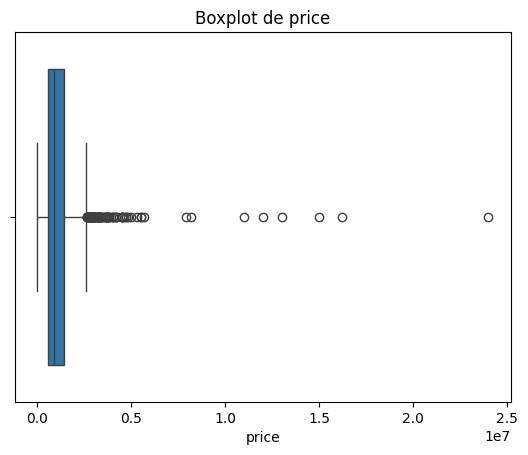

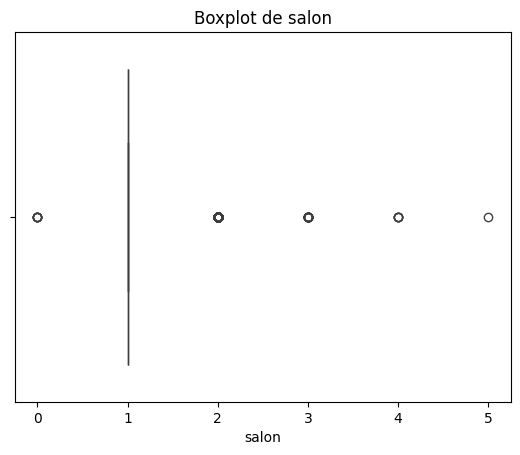

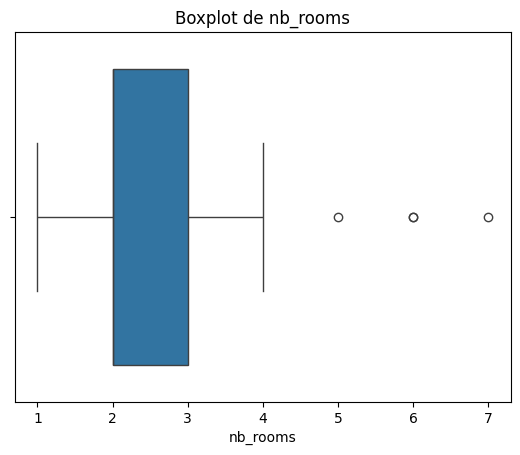

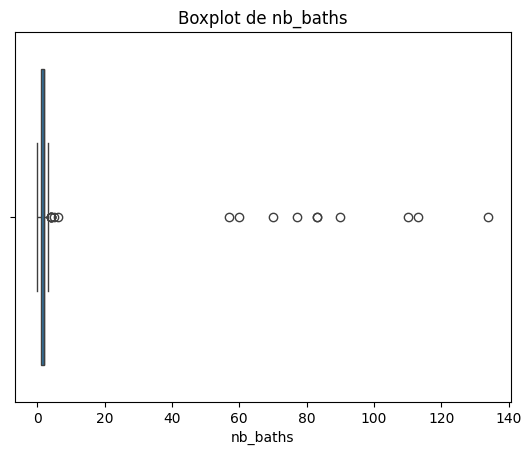

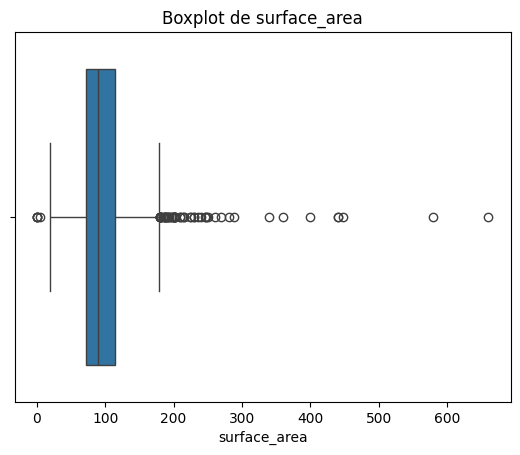

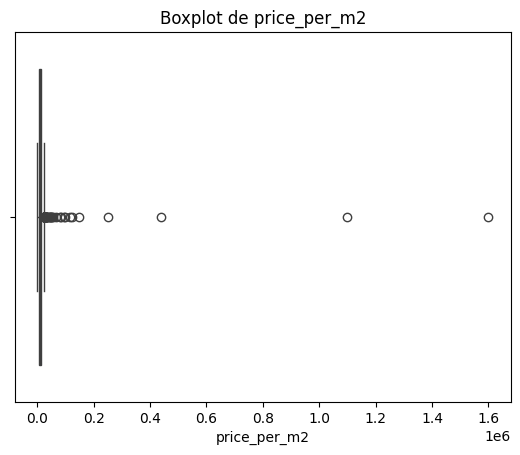

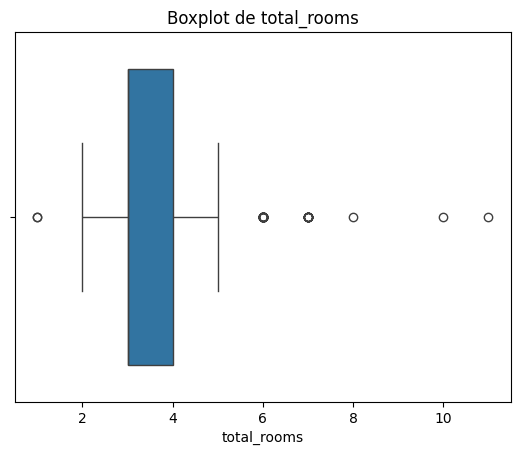

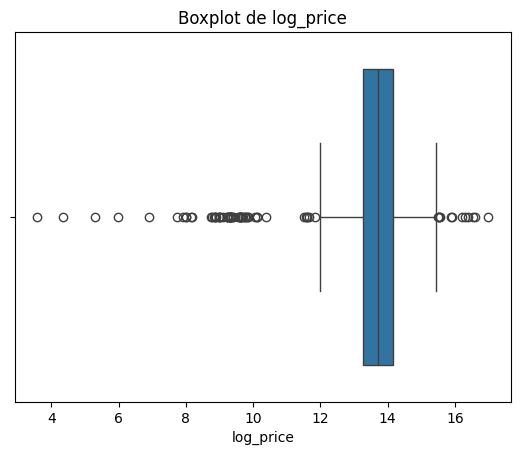

In [326]:
#show boxplots pour visualiser les outliers
for i in df.select_dtypes(include='float').columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot de {i}')
    plt.show()


In [327]:
# # Capping des outliers pour toutes les colonnes float selon bornes IQR
cols=df.select_dtypes(include='float64').columns
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = max(q1 - 1.5 * iqr, 0)  # üîí √©viter des valeurs n√©gatives
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)
    print(f"Outliers cap√©s pour {col} : bornes [{lower:.2f}, {upper:.2f}]")
outlier_report = {}


Outliers cap√©s pour price : bornes [0.00, 2628125.00]
Outliers cap√©s pour salon : bornes [1.00, 1.00]
Outliers cap√©s pour nb_rooms : bornes [0.50, 4.50]
Outliers cap√©s pour nb_baths : bornes [0.00, 3.50]
Outliers cap√©s pour surface_area : bornes [7.50, 179.50]
Outliers cap√©s pour price_per_m2 : bornes [0.00, 23322.95]
Outliers cap√©s pour total_rooms : bornes [1.50, 5.50]
Outliers cap√©s pour log_price : bornes [11.95, 15.47]


In [328]:

# Traitement price par ville avec capping IQR
if 'city_name' in df.columns and 'price' in df.columns:
    for city in df['city_name'].unique():
        mask = df['city_name'] == city
        q1 = df.loc[mask, 'price'].quantile(0.25)
        q3 = df.loc[mask, 'price'].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        df.loc[mask, 'price'] = df.loc[mask, 'price'].clip(lower, upper)
        outlier_report[city] = [round(lower, 0), round(upper, 0)]


In [329]:

# Capping surface_area
if 'surface_area' in df.columns:
    df['surface_area'] = df['surface_area'].clip(40, 300)
    outlier_report['surface_area'] = [40, 300]

# Capping nb_baths
if 'nb_baths' in df.columns:
    df['nb_baths'] = np.minimum(df['nb_baths'], 4)
    outlier_report['nb_baths'] = ['max 4']

# Capping nb_rooms (optionnel)
if 'nb_rooms' in df.columns:
    df['nb_rooms'] = np.minimum(df['nb_rooms'], 5)
    outlier_report['nb_rooms'] = ['max 5']

print("R√©sum√© du traitement des outliers :")
for key, val in outlier_report.items():
    print(f"{key}: {val}")


R√©sum√© du traitement des outliers :
Casablanca: [np.float64(-747500.0), np.float64(3112500.0)]
Dar Bouazza: [np.float64(-762500.0), np.float64(2897500.0)]
Rabat: [np.float64(-981250.0), np.float64(4408750.0)]
Marrakech: [np.float64(-475000.0), np.float64(2445000.0)]
Asilah: [np.float64(302500.0), np.float64(1282500.0)]
Bouskoura: [np.float64(342125.0), np.float64(1443125.0)]
K√©nitra: [np.float64(84999.0), np.float64(1405001.0)]
Mohammedia: [np.float64(-150000.0), np.float64(2090000.0)]
Tamesna: [np.float64(-111875.0), np.float64(1333125.0)]
Sal√©: [np.float64(-317500.0), np.float64(1982500.0)]
Had Soualem: [np.float64(270000.0), np.float64(830000.0)]
Benslimane: [np.float64(1099999.0), np.float64(1099999.0)]
Agadir: [np.float64(-476500.0), np.float64(2527500.0)]
Temara: [np.float64(-163750.0), np.float64(2406250.0)]
Tanger: [np.float64(-989000.0), np.float64(2875000.0)]
Bouznika: [np.float64(300000.0), np.float64(1020000.0)]
Mekn√®s: [np.float64(-537500.0), np.float64(1682500.0)]
F√

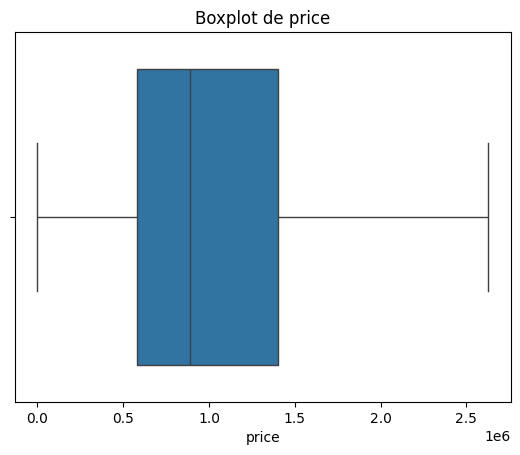

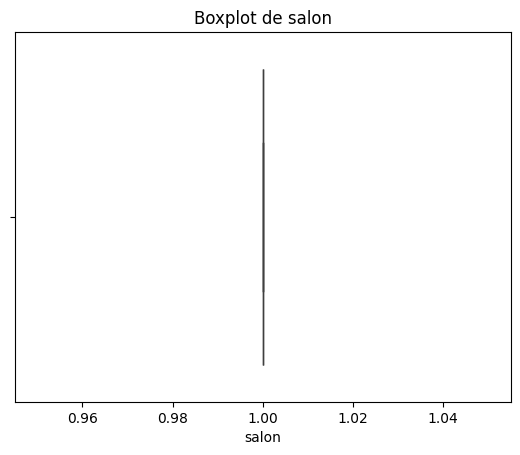

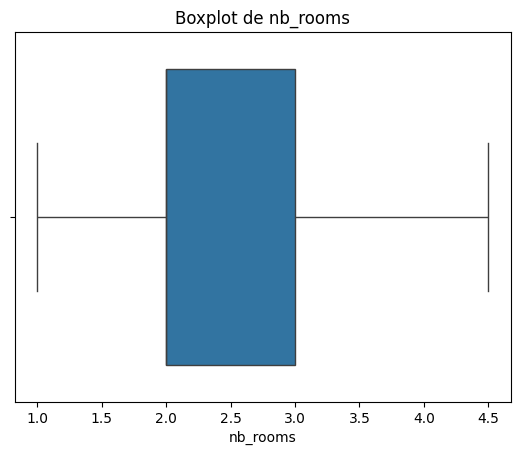

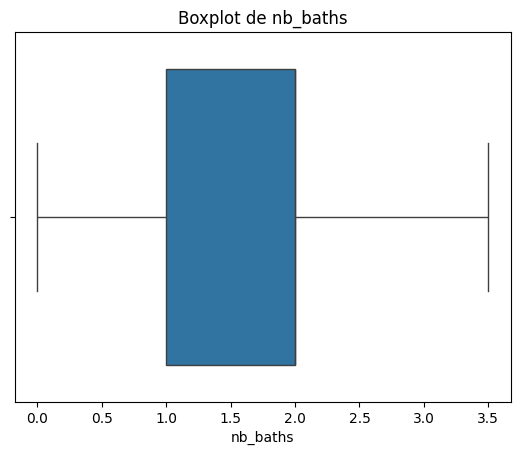

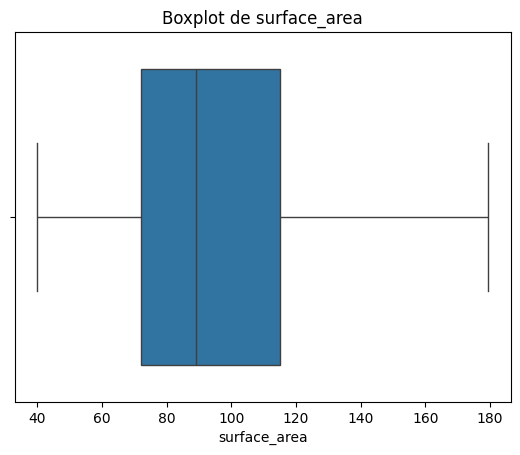

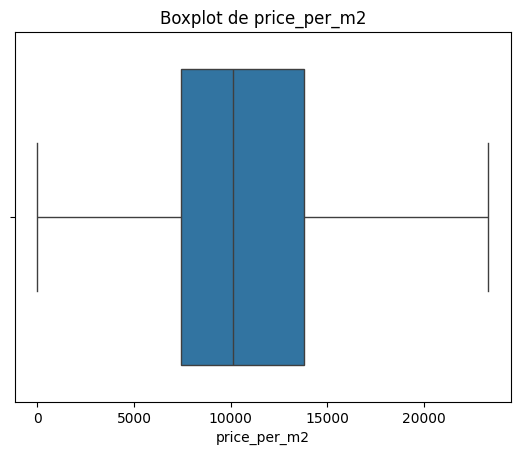

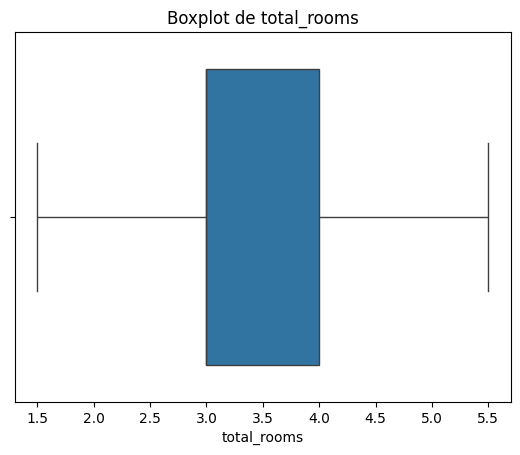

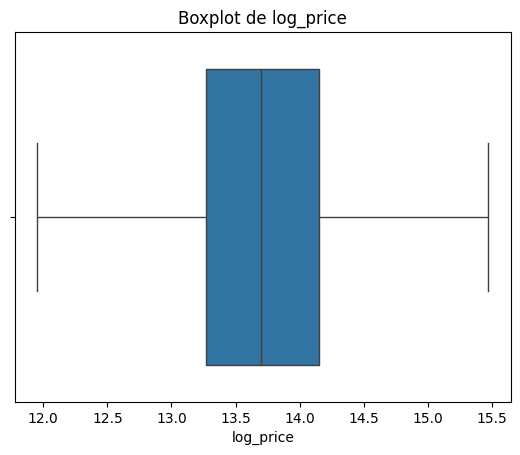

In [330]:
#show boxplots pour visualiser les outliers
for i in df.select_dtypes(include='float').columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot de {i}')
    plt.show()


### 3.8 Encodage des variables cat√©gorielles (`LabelEncoder`)

On transforme les cat√©gories en nombres pour que les mod√®les puissent les utiliser.


In [331]:
# Encodage de la colonne city_name avec LabelEncoder
from sklearn.preprocessing import LabelEncoder
if 'city_name' in df.columns:
    le = LabelEncoder()
    df['city_name_encoded'] = le.fit_transform(df['city_name'])
    print("Colonne 'city_name' encod√©e (LabelEncoder) dans 'city_name_encoded'.")

Colonne 'city_name' encod√©e (LabelEncoder) dans 'city_name_encoded'.



### 3.9 Normalisation des variables num√©riques (`StandardScaler`)

On standardise les variables num√©riques pour les rendre comparables et faciliter l‚Äôapprentissage.


In [332]:
# Application de la standardisation (StandardScaler) sur les variables num√©riques
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
print("Variables num√©riques standardis√©es pr√™tes pour la mod√©lisation.")
df_scaled.head()

Variables num√©riques standardis√©es pr√™tes pour la mod√©lisation.


price  salon  nb_rooms  nb_baths  surface_area  price_per_m2  \
0  1.414123    0.0 -0.581652  0.509547      2.138607      0.181045   
1  0.201301    0.0 -0.581652  0.509547      0.057348      0.235943   
2  0.434826    0.0 -0.581652  0.509547     -0.448100      1.085245   
3 -0.243149    0.0 -2.122128 -1.075225     -1.191407      0.972220   
4  2.360463    0.0  0.958825  0.509547      2.480528      0.863716   

   total_rooms  log_price  
0    -0.708192   1.126936  
1    -0.708192   0.409589  
2    -0.708192   0.579465  
3    -1.902059   0.014691  
4     1.679543   1.737383

## 4. S√©lection des variables explicatives

### 4.1 Corr√©lation des variables avec la cible `price`

On mesure le lien entre chaque variable et la variable cible `price` pour rep√©rer celles qui ont un impact important.


In [333]:
# 1. Calcul des corr√©lations avec 'price'
corr_matrix = df.corr(numeric_only=True)
price_corr = corr_matrix['price'].drop('price')


### 4.2 S√©lection des features les plus pertinentes (|corr| > 0.15)

On conserve uniquement les variables dont la corr√©lation (positive ou n√©gative) avec le prix est significative (valeur absolue sup√©rieure √† 0.15).


In [334]:
# 2. S√©lection des variables corr√©l√©es au prix (|corr| > 0.15)
selected_vars = price_corr[price_corr.abs() > 0.15].sort_values(ascending=False)
print("Variables corr√©l√©es au prix (|corr| > 0.15) :")
for var, val in selected_vars.items():
    print(f"- {var} : corr = {val:.2f}")

Variables corr√©l√©es au prix (|corr| > 0.15) :
- log_price : corr = 0.94
- price_per_m2 : corr = 0.80
- surface_area : corr = 0.63
- nb_baths : corr = 0.41
- total_rooms : corr = 0.37
- nb_rooms : corr = 0.35
- Ascenseur : corr = 0.34
- Parking : corr = 0.26
- Climatisation : corr = 0.23
- Terrasse : corr = 0.22
- Chauffage : corr = 0.21
- Concierge : corr = 0.21
- Balcon : corr = 0.16



### 4.3 D√©tection et suppression des variables fortement corr√©l√©es entre elles (|corr| > 0.8)

On supprime les variables tr√®s similaires entre elles pour √©viter la redondance et am√©liorer la performance du mod√®le.


In [335]:
# 3. V√©rification de la redondance entre les variables s√©lectionn√©es
selected_corr = corr_matrix.loc[selected_vars.index, selected_vars.index]

#  D√©tection des couples fortement corr√©l√©s entre eux (|corr| > 0.8)
high_corr_pairs = []
for i, var1 in enumerate(selected_vars.index):
    for var2 in selected_vars.index[i+1:]:
        corr_val = selected_corr.loc[var1, var2]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((var1, var2, corr_val))

if high_corr_pairs:
    print("\nüîÅ Variables tr√®s corr√©l√©es entre elles (|corr| > 0.8) :")
    for v1, v2, val in high_corr_pairs:
        print(f"- {v1} & {v2} : corr = {val:.2f}")
else:
    print("\n‚úÖ Aucune forte redondance d√©tect√©e.")


üîÅ Variables tr√®s corr√©l√©es entre elles (|corr| > 0.8) :
- log_price & price_per_m2 : corr = 0.82
- total_rooms & nb_rooms : corr = 0.86


## 5. üîÑ S√©paration des donn√©es

### 5.1 üéØ D√©finition de la variable cible `y`

La variable cible est la **valeur √† pr√©dire** par notre mod√®le.  
Ici, il s‚Äôagit du **prix de l‚Äôappartement (`price`)**.


In [336]:
# S√©paration des donn√©es pour la mod√©lisation
from sklearn.model_selection import train_test_split
# Variable cible
y = df['price']


### 5.2 üß† S√©lection des variables explicatives `X`

Les variables explicatives (*features*) sont les colonnes utilis√©es pour expliquer ou pr√©dire le prix.  
Elles sont choisies selon leur corr√©lation au prix et leur non-redondance avec d'autres variables.


In [337]:
# Variables explicatives : colonnes s√©lectionn√©es pr√©c√©demment
features = [var for var in selected_vars.index if var != 'log_price']
X = df[features]


### 5.3 ‚úÇÔ∏è Division du dataset en jeu d‚Äôentra√Ænement et de test (80/20)

Le dataset est divis√© en deux parties :
- **Jeu d‚Äôentra√Ænement (80%)** : utilis√© pour entra√Æner le mod√®le.
- **Jeu de test (20%)** : utilis√© pour √©valuer la performance du mod√®le sur des donn√©es inconnues.


In [338]:
# Division des donn√©es en ensemble d'entra√Ænement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (1163, 12)
Taille de X_test : (291, 12)
Taille de y_train : (1163,)
Taille de y_test : (291,)


# 6. ü§ñ Entra√Ænement et s√©lection des mod√®les de r√©gression

---

## 6.1 ‚öôÔ∏è Entra√Ænement des mod√®les de base

Nous entra√Ænons plusieurs mod√®les classiques pour la r√©gression :

- R√©gression Lin√©aire
- Random Forest Regressor
- Support Vector Regressor (SVR)
- Gradient Boosting Regressor

Chaque mod√®le sera entra√Æn√© sur le jeu d'entra√Ænement, puis √©valu√© sur le jeu de test.



In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'R√©gression Lin√©aire': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"R¬≤   : {r2:.2f}")



=== R√©gression Lin√©aire ===
MSE  : 36389324463.99
RMSE : 190759.86
MAE  : 114035.40
R¬≤   : 0.93

=== Random Forest ===
MSE  : 14676254304.44
RMSE : 121145.59
MAE  : 38235.40
R¬≤   : 0.97

=== SVR ===
MSE  : 524231948662.78
RMSE : 724038.64
MAE  : 537553.96
R¬≤   : -0.07

=== Gradient Boosting ===
MSE  : 16859717392.26
RMSE : 129844.97
MAE  : 57034.02
R¬≤   : 0.97


## 6.2 üîÅ Validation crois√©e (5-fold)

Pour √©valuer la robustesse des mod√®les, on r√©alise une validation crois√©e 5-fold sur l‚Äôensemble complet des donn√©es.

On mesure le score R¬≤ moyen et son √©cart-type pour chaque mod√®le.



Validation crois√©e (5-fold) - Score R¬≤ moyen et √©cart-type :
R√©gression Lin√©aire: R¬≤ moyen = 0.913, √©cart-type = 0.017


Random Forest: R¬≤ moyen = 0.970, √©cart-type = 0.011
SVR: R¬≤ moyen = -0.085, √©cart-type = 0.056
Gradient Boosting: R¬≤ moyen = 0.962, √©cart-type = 0.011


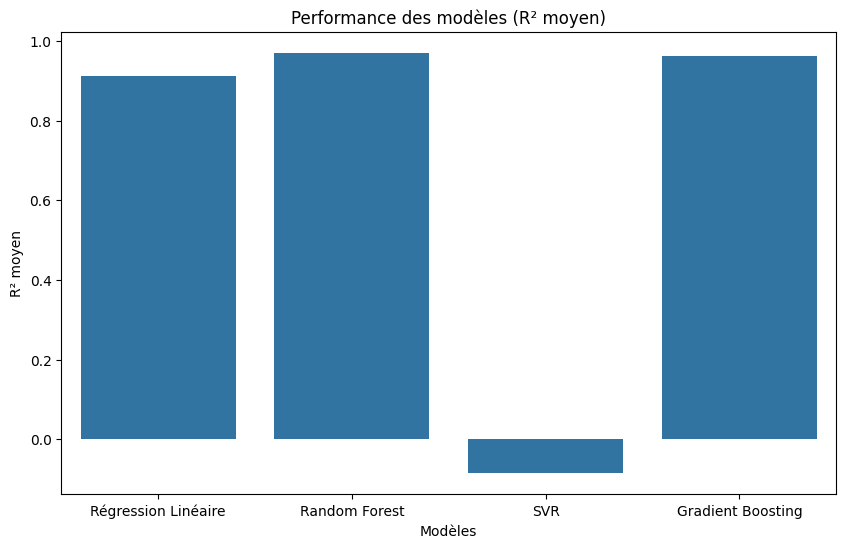

In [340]:
from sklearn.model_selection import cross_val_score

print("Validation crois√©e (5-fold) - Score R¬≤ moyen et √©cart-type :")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: R¬≤ moyen = {scores.mean():.3f}, √©cart-type = {scores.std():.3f}")
# Visualisation des performances des mod√®les
import matplotlib.pyplot as plt 
import seaborn as sns
model_names = list(models.keys())
r2_scores = [cross_val_score(model, X, y, cv=5, scoring='r2').mean() for model in models.values()]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title('Performance des mod√®les (R¬≤ moyen)')
plt.xlabel('Mod√®les')
plt.ylabel('R¬≤ moyen')
plt.show()

## 6.3 üîß Optimisation des hyperparam√®tres

On optimise les hyperparam√®tres des mod√®les √† l‚Äôaide de GridSearchCV (pour la r√©gression lin√©aire) et RandomizedSearchCV (pour les autres mod√®les plus complexes).

Cela permet d‚Äôam√©liorer la performance en testant plusieurs configurations.



In [341]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best_params = {}

# R√©gression Lin√©aire (GridSearch)
lr_grid = {'fit_intercept': [True, False]}
lr_search = GridSearchCV(LinearRegression(), lr_grid, cv=3, scoring='r2')
lr_search.fit(X, y)
best_params['R√©gression Lin√©aire'] = lr_search.best_params_
print(f"R√©gression Lin√©aire - meilleurs param√®tres : {lr_search.best_params_}")

# Random Forest (RandomizedSearch)
rf_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_grid,
    n_iter=6,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X, y)
best_params['Random Forest'] = rf_search.best_params_
print(f"Random Forest - meilleurs param√®tres : {rf_search.best_params_}")

# SVR (RandomizedSearch)
svr_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svr_search = RandomizedSearchCV(
    SVR(),
    svr_grid,
    n_iter=6,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
svr_search.fit(X, y)
best_params['SVR'] = svr_search.best_params_
print(f"SVR - meilleurs param√®tres : {svr_search.best_params_}")

# Gradient Boosting (RandomizedSearch)
gb_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_grid,
    n_iter=6,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
gb_search.fit(X, y)
best_params['Gradient Boosting'] = gb_search.best_params_
print(f"Gradient Boosting - meilleurs param√®tres : {gb_search.best_params_}")

print("\nR√©sum√© des meilleurs hyperparam√®tres pour chaque mod√®le :")
for name, params in best_params.items():
    print(f"{name}: {params}")


R√©gression Lin√©aire - meilleurs param√®tres : {'fit_intercept': True}
Random Forest - meilleurs param√®tres : {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
SVR - meilleurs param√®tres : {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting - meilleurs param√®tres : {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

R√©sum√© des meilleurs hyperparam√®tres pour chaque mod√®le :
R√©gression Lin√©aire: {'fit_intercept': True}
Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
SVR: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


## 6.4 üîÅ Validation crois√©e approfondie (10-fold)

On √©value les mod√®les optimis√©s via une validation crois√©e 10-fold, avec calcul du MAE et du R¬≤ moyen, pour une estimation fine de la performance.



Validation crois√©e (10-fold) - MAE et R¬≤ moyens :
R√©gression Lin√©aire:
  üîπ MAE moyen = 113905.78, √©cart-type = 10882.77
  üîπ R¬≤ moyen  = 0.9129, √©cart-type = 0.0263
Random Forest:
  üîπ MAE moyen = 39483.98, √©cart-type = 12516.33
  üîπ R¬≤ moyen  = 0.9671, √©cart-type = 0.0267
SVR:
  üîπ MAE moyen = 506669.89, √©cart-type = 38766.79
  üîπ R¬≤ moyen  = -0.0848, √©cart-type = 0.0562
Gradient Boosting:
  üîπ MAE moyen = 53662.50, √©cart-type = 8931.45
  üîπ R¬≤ moyen  = 0.9610, √©cart-type = 0.0248


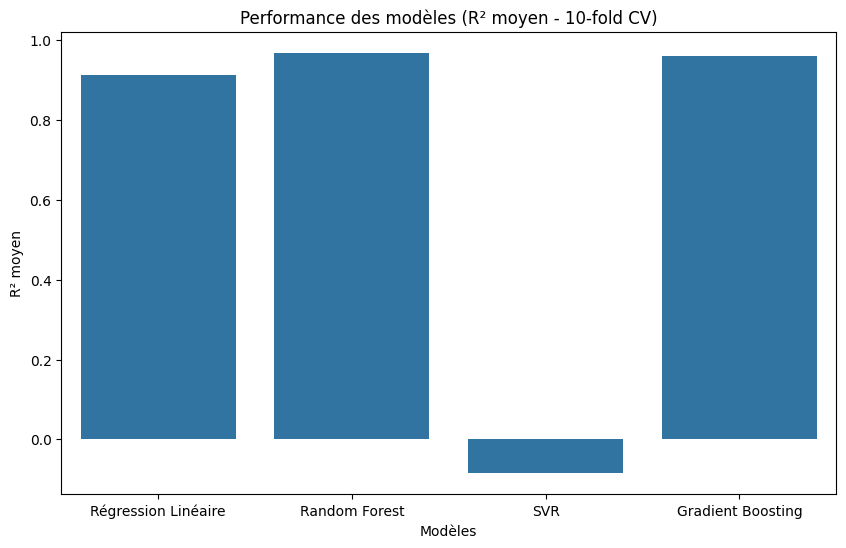

In [342]:
print("Validation crois√©e (10-fold) - MAE et R¬≤ moyens :")
for name, model in models.items():
    mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

    print(f"{name}:")
    print(f"  üîπ MAE moyen = {mae_scores.mean():.2f}, √©cart-type = {mae_scores.std():.2f}")
    print(f"  üîπ R¬≤ moyen  = {r2_scores.mean():.4f}, √©cart-type = {r2_scores.std():.4f}")
# Visualisation des performances des mod√®les


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=[cross_val_score(model, X, y, cv=10, scoring='r2').mean() for model in models.values()])
plt.title('Performance des mod√®les (R¬≤ moyen - 10-fold CV)')
plt.xlabel('Mod√®les')
plt.ylabel('R¬≤ moyen')
plt.show()


## 6.5 üèÜ S√©lection et sauvegarde du meilleur mod√®le

On s√©lectionne le meilleur mod√®le selon les m√©triques R¬≤ et RMSE sur le jeu test, puis on sauvegarde ce mod√®le pour usage futur.



In [343]:
import joblib

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'name': name, 'model': model, 'r2': r2, 'rmse': rmse})

best = max(results, key=lambda x: (x['r2'], -x['rmse']))

print(f"Meilleur mod√®le : {best['name']} | R¬≤ = {best['r2']:.3f} | RMSE = {best['rmse']:.2f}")

joblib.dump(best['model'], '../models/model2.pkl')
print("Mod√®le sauvegard√© dans 'model.pkl'")


Meilleur mod√®le : Random Forest | R¬≤ = 0.970 | RMSE = 121145.59
Mod√®le sauvegard√© dans 'model.pkl'
